<a href="https://colab.research.google.com/github/JS0501/ESAA_OB/blob/main/ESAA0929.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **06. 토픽 모델링(Topic Modeling) - 20 뉴스 그룹**

토픽 모델링이란 문서 집합에 숨어 있는 주제를 찾아내는 것이다.

사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다.

토픽 모델링에 자주 사용되는 기법은 LSA(Latent Semantic Analysis)와 LDA(Latent Dirichlet Allocation)이다. 여기선 LDA를 통한 토픽 모델링을 사용한다.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출.
cats = ['rec.motorcycles','rec.sport.baseball','comp.graphics','comp.windows.x','talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'),categories=cats,random_state=0)

# LDA는 Count 기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95,max_features=1000,min_df=2,stop_words='english',ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:',feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터이다.

이렇게 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행한다.

토픽의 개수는 위의 뉴스 그룹에서 추출한 주제와 동일한 8개로 정한다.

n_components 파라미터를 이용해 토픽 개수를 조정한다.

In [ ]:
lda = LatentDirichletAllocation(n_components=8,random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가지고 있다.

높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 된다.

components_의 형태와 속성값을 확인한다.

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[2.69030238e+02, 1.87798026e+02, 7.09003824e+01, ...,
        1.22710343e+01, 1.06329639e+02, 7.25995512e+01],
       [1.25091799e-01, 2.46049106e+00, 1.25051902e-01, ...,
        2.80071176e+02, 1.25089783e-01, 5.05669662e+01],
       [1.33978420e+02, 1.25042012e-01, 9.98277256e+01, ...,
        1.25092219e-01, 3.31078261e+01, 1.25028398e-01],
       ...,
       [2.98813886e+01, 1.88071366e+01, 1.14748730e+01, ...,
        1.93022584e+01, 5.29368271e+00, 1.44478198e+01],
       [1.25074899e-01, 1.25105300e-01, 1.25004235e-01, ...,
        1.03576436e+02, 1.25100535e-01, 7.22276359e+01],
       [1.25172284e-01, 1.03967760e+00, 1.25221075e-01, ...,
        5.31740996e+01, 1.25025929e-01, 1.25062991e-01]])

components_ 값만으로는 각 토픽별 word 연관도를 보기가 어렵다.

display_topics() 함수를 만들어 각 토픽별로 연관도가 높은 순으로 Word를 나열한다.

In [ ]:
def display_topics(model,feature_names,no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #',topic_index)

    # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_feature_names_out()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda,feature_names,15)

Topic # 0
10 year medical health 1993 20 12 disease cancer team patients research number new 11
Topic # 1
don just like know think good time ve does way really people want ll right
Topic # 2
image file jpeg output program gif images format files color entry use bit 03 02
Topic # 3
armenian armenians turkish people said turkey armenia government genocide turks muslim russian greek azerbaijan killed
Topic # 4
israel jews dos jewish israeli dos dos arab state people arabs palestinian adl ed anti peace
Topic # 5
edu com available graphics ftp window use mail data motif software version pub information server
Topic # 6
god people jesus church believe say christ does christian think christians did know bible man
Topic # 7
thanks use using does help like display need problem know server screen windows window program


### **07. 문서 유사도**

- 문서 유사도 측정 방법 - 코사인 유사도

문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도를 사용한다.

코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반한다.

즉, 코사인 유사도는 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것이다.

- 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유

문서를 피처 벡터화하면 차원이 매우 많은 희소 행렬이 되기 쉽다.

이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표(예를 들어 유클리드 거리 기반 지표)는 정확도가 떨어지기 쉽다.

또한 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없다.

간단한 문서에 대해 서로 간의 문서 유사도를 코사인 유사도 기반으로 구해본다.

In [ ]:
import numpy as np

def cos_similarity(v1,v2):
  dot_product = np.dot(v1,v2)
  l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환한다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [ ]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1,vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1,vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2,vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0],feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0],feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple,feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


- Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [1]:
import nltk

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


from google.colab import drive

drive.mount('/content/drive') # 드라이브에서 불러올 경우


# 필수 NLTK 데이터 다운로드

nltk.download('punkt')

nltk.download('punkt_tab')

nltk.download('wordnet')


def LemNormalize(text):

  lemmatizer = WordNetLemmatizer()

  return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
import glob, os
import warnings
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
from sklearn.cluster import KMeans
import zipfile

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 700)

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 압축 파일 경로와 압축 해제할 디렉터리 지정
zip_path = '/content/drive/MyDrive/ESAA OB/opinosis+opinion+frasl+review.zip'
extract_to = '/content/opinosis_dataset'

# 이미 압축 해제된 상태가 아니면 한 번만 실행
if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# 압축 해제된 디렉터리 내부의 topics 폴더로 경로 지정
path = os.path.join(extract_to, 'OpinosisDataset1.0', 'topics')

# path로 지정한 디렉터리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename = os.path.splitext(os.path.basename(file_))[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

tfidf_vect = TfidfVectorizer(
    tokenizer=LemNormalize,
    stop_words='english',
    ngram_range=(1,2),
    min_df=0.05,
    max_df=0.85
)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
document_df['cluster_label'] = cluster_label


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 알아본다.

문서를 피처 벡터화해 변환하면 문서 내 단어(Word)에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화된다.

이렇게 각 문서가 피처 벡터화된 데이터를 cosine_simularity()를 이용해 상호 비교해 유사도를 확인한다.

이를 위해 호텔을 주제로 군집화된 데이터를 먼저 추출하고 이 데이터에 해당하는 TfidfVectorizer의 데이터를 추출한다.

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명',comparison_docname,'와 타 문서 유사도######')

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]],feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Index([ 1,  8,  9, 10, 11, 13, 15, 16, 18, 19, 20, 23, 24, 25, 28, 33, 34, 35,
       36, 39, 41, 45, 46, 47, 48],
      dtype='int64')
##### 비교 기준 문서명 updates_garmin_nuvi_255W_gps.txt 와 타 문서 유사도######
[[1.         0.01633397 0.17205143 0.09263779 0.20688096 0.01451434
  0.01530619 0.03174956 0.01495105 0.02353352 0.19030441 0.02637107
  0.03231224 0.02409195 0.0510945  0.06807241 0.03000837 0.05909463
  0.18828502 0.02785756 0.04061228 0.02725286 0.01734178 0.1031313
  0.03715084]]


단순히 숫자로만 표시해서는 직관적으로 문서가 어느 정도 유사도를 가지는지 이해하기 어려울 수 있으므로 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화한다.

cosine_similarity()는 쌍 형태의 ndarray를 반환하므로 이를 판다스 인덱스로 이용하기 위해 reshape(-1)로 차원을 변경한다.

가장 유사도가 큰 파일명 및 유사도:
 filename      display_garmin_nuvi_255W_gps.txt
similarity                            0.206881
Name: 11, dtype: object


Text(0.5, 1.0, 'updates_garmin_nuvi_255W_gps.txt')

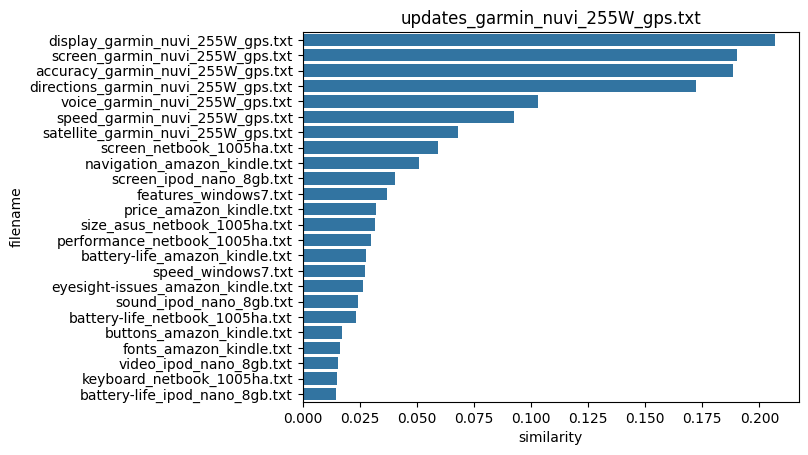

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity',y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

### **09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

**한글 NLP 처리의 어려움**

일반적으로 한글 언어 처리는 영어 등의 라틴어 처리보다 어렵다.

주된 원인은 '띄어쓰기'와'다양한 조사' 때문이다.

p.559~561 코드 생략

**KoNLPy**

KoNLPy는 파이썬의 대표적인 한글 형태로 패키지이다.

형태소의 사전적인 의미는 '단어로서 의미를 가지는 최소 단위'로 정의할 수 있다.

형태소 분석(Morphological analysis)이란 말뭉치를 이러한 형태로 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업을 일반적으로 지칭한다.

p.562  **데이터 로딩**

In [13]:
import pandas as pd

# Changed encoding to utf-8 to handle potential decoding issues
train_df = pd.read_csv('/content/drive/MyDrive/ESAA OB/ratings_train.txt',sep='\t',encoding='utf-8')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


학습 데이터 세트의 0과 1의 Label 값 비율을 살펴본다.

1이 긍정, 0이 부정 감성이다.

In [14]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


In [17]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+"," ",x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA OB/ratings_test.txt',sep='\t',encoding='utf-8')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d+"," ",x))

# id 칼럼 삭제 수행
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

TF-IDF 방식으로 단어를 벡터화한다.

각 문장을 한글 형태소 분석을 통해 형태소 단어로 토근화한다.

한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스를 이용한다.

Twitter 객체의 morphs() 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환한다.

In [19]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 32.3 MB/s eta 0:00:00


In [20]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

사이킷런의 TfidVectorizer를 이용해 TF-IDF 피처 모델을 생성한다.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer,ngram_range=(1,2),min_df=3,max_df=0.9)
tfidf_vect.fit(train_df['document'])
train_tfidf_vect = tfidf_vect.transform(train_df['document'])

로지스틱 회귀를 이용해 분류 기반의 감성 분석을 수행한다.

로지스틱 회귀의 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV를 이용한다.

In [23]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state=0,solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = {'C':[1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lg_clf,param_grid=params,cv=3,scoring='accuracy',verbose=1)
grid_cv.fit(train_tfidf_vect,train_df['label']) # 수정
print(grid_cv.best_params_,round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [24]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearhCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:',accuracy_score(test_df['label'],preds))

Logistic Regression 정확도: 0.86172
